# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import _pickle as pickle
import numpy as np
from sklearn.utils import shuffle

training_file = '../datasets/traffic-signs-data/train.p'
testing_file = '../datasets/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test_data, y_test = test['features'], test['labels']

x_train, y_train = shuffle(x_train, y_train)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
n_train = len(x_train)
n_test = len(x_test_data)
image_shape = x_train[0].shape

num_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", num_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

<module 'matplotlib.pyplot' from '/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py'>

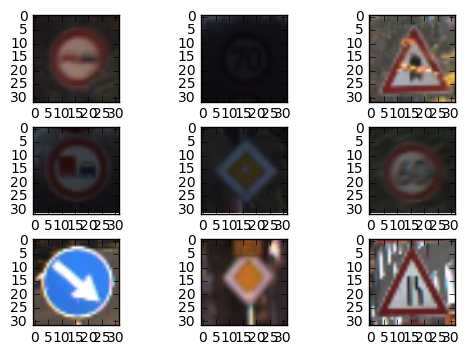

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_images(images, gray=True):
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if gray == True:
            ax.imshow(np.reshape(images[i],(32,32)), cmap='gray')
        else:
            ax.imshow(images[i])
    
    return plt

plot_images(x_train[0:9], False)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import cv2

def preprocess_grayscale(x_data):
    img_shape = x_data.shape
    norm_images = np.zeros((img_shape[0], img_shape[1], img_shape[2], 3))
    kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    for i in range(0, len(x_data)):
        n_img = x_data[i]
        n_img = cv2.cvtColor(n_img, cv2.COLOR_RGB2GRAY)
        n_img = cv2.filter2D(n_img, -1, kernel_sharpen_1)
        n_img = cv2.equalizeHist(n_img)
        n_img = 1-normalize(n_img)        
        
        norm_images[i] = np.reshape(n_img, (32, 32, 1))
        
    return norm_images

def prepare_color(x_data):
    return (x_data.astype(float)-128.0)/128.0

x_train = prepare_color(x_train)
x_test = prepare_color(x_test_data)

<module 'matplotlib.pyplot' from '/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py'>

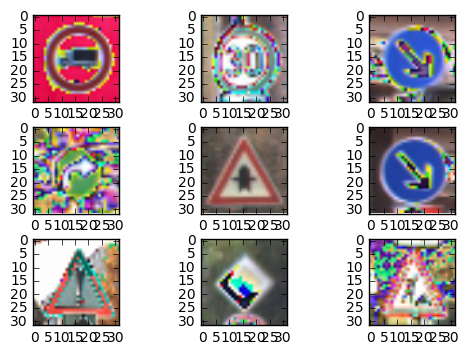

In [5]:
plot_images(x_test[0:9], False)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Simply leave the colors and convert features from (-1 to 1). That will keep with 0 mean and unit variance.

I have tried other approaches:

- Convert to grayscale
- Sharpen images
- equalize Histogram
- Normalize

But results were no better. Apparantly converting to grayscale looses performance, so only transformation I do is (x-128)/128

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
def split_data(x, y, test_size=0.2, random_state=123):
    return train_test_split(x, y, test_size=test_size, random_state=random_state)


x_train, x_validation, y_train, y_validation = split_data(x_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I split training data into training and validation 20% for validation. I have also tried to generate additional images from training data (rotate -15 +15 also zoom in/out). But accuracy only got worse, therefore I have not spent too much time on generating extra images since current accuracy is acceptable.
It is worth stressing out that there are many pictures of the same sign just slightly different position e.g. closer. Something it is worth trying is to cleaning training dataset.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def new_weights(shape, mu=0, sigma=0.1, name='W'):
    return tf.Variable(tf.truncated_normal(shape, mean=mu, stddev=sigma),name=name)

def new_biases(length, name='B'):
    return tf.Variable(tf.zeros(length),name=name)

def evaluate(accuracy_operation, X_data, y_data, x, y, keep_prob, BATCH_SIZE=256):
    num_examples = len(X_data)
    total_accuracy = 0

    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        feed_dict = {x: batch_x, y: batch_y, keep_prob: 1}
        accuracy = sess.run(accuracy_operation, feed_dict=feed_dict)
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True, name='LayerX'):  # Use 2x2 max-pooling.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    weights = new_weights(shape=shape, name='{}W'.format(name))
    biases = new_biases(length=num_filters, name='{}B'.format(name))
    layer = tf.nn.conv2d(input, weights, strides=[1, 1, 1, 1], padding='SAME', name=name)
    layer += biases
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME', name='{}pooling'.format(name))

    layer = tf.nn.relu(layer, name='{}relu'.format(name))
    print ('Layer: {}'.format(shape))
    return layer, weights

def flatten_layer(layer, name='flatten'):
    return flatten(layer)

def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True, name='fclayer'): # Use Rectified Linear Unit (ReLU)?
    weights = new_weights(shape=[num_inputs, num_outputs], name='{}w'.format(name))
    biases = new_biases(length=num_outputs, name='{}b'.format(name))
    layer = tf.matmul(input, weights, name='{}matul'.format(name)) + biases
    if use_relu:
        layer = tf.nn.relu(layer,name='{}Relu'.format(name))

    return layer

In [8]:
model_filename = 'final'

EPOCHS = 70
BATCH_SIZE = 300

filter_size1 = 5
num_filters1 = 16

filter_size2 = 5
num_filters2 = 64

fc_size = 512

img_size = x_train[0].shape[0]
img_size_flat = x_train[0].shape[1] * x_train[0].shape[0]
img_shape = (img_size, img_size)

num_channels = x_train[0].shape[2]

stddev=0.1
rate = 0.001

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The kernel size I choose to use is 5x5.
1. First layer input is 32x32x3 and output is 16 filters.
2. Second layer takes the input from the first layer and outputs 64 filters
3. Flatten
4. Fully Connected layer 1 input = 4096 neurons, output = 512
5. Dropout keep_prob = 0.5
6. Fully Connected Layer 2 input = 512 neurons, output = 43  

There are some areas for improvements as there is no strong mechanism to avoid overfitting. Introducing reguralization might improve the performance.

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.
keep_prob = tf.placeholder(tf.float32, (None), name='Placeholderkeepprob')
x = tf.placeholder(tf.float32, (None, img_size, img_size, num_channels), name='PlaceholderX')
y = tf.placeholder(tf.int32, (None), name='PlaceholderY')

one_hot_y = tf.one_hot(y, num_classes, name='onehoty')

layer_conv1, weights_conv1 = new_conv_layer(x, num_channels, filter_size1, num_filters1, True, name='layer1')
layer_conv2, weights_conv2 = new_conv_layer(layer_conv1, num_filters1, filter_size2, num_filters2, True, name='layer2')        

fc0 = flatten(layer_conv2)
fc1 = new_fc_layer(fc0,4096,fc_size, name='fc1')
#fc2 = new_fc_layer(fc1,1024,fc_size, name='fc2')

dropout = tf.nn.dropout(fc1, keep_prob, name='dropout1')
    
logits = new_fc_layer(dropout,fc_size,num_classes, name='fc2')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name='correctprediction')
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracyoperation')

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y, name='crossentropy')
loss_operation = tf.reduce_mean(cross_entropy, name='lossoperation')

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation, name='trainingoperation')

Layer: [5, 5, 3, 16]
Layer: [5, 5, 16, 64]


In [10]:
num_examples = len(x_train)
with tf.Session() as sess:
    print("Training...")
    sess.run(tf.global_variables_initializer())
    
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation,feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(accuracy_operation, x_validation, y_validation, x, y, keep_prob)
        print("epoch: {} Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, model_filename)
    print("Model saved")

Training...
epoch: 1 Validation Accuracy = 0.652
epoch: 2 Validation Accuracy = 0.875
epoch: 3 Validation Accuracy = 0.919
epoch: 4 Validation Accuracy = 0.938
epoch: 5 Validation Accuracy = 0.944
epoch: 6 Validation Accuracy = 0.956
epoch: 7 Validation Accuracy = 0.969
epoch: 8 Validation Accuracy = 0.972
epoch: 9 Validation Accuracy = 0.973
epoch: 10 Validation Accuracy = 0.982
epoch: 11 Validation Accuracy = 0.983
epoch: 12 Validation Accuracy = 0.984
epoch: 13 Validation Accuracy = 0.983
epoch: 14 Validation Accuracy = 0.983
epoch: 15 Validation Accuracy = 0.985
epoch: 16 Validation Accuracy = 0.984
epoch: 17 Validation Accuracy = 0.983
epoch: 18 Validation Accuracy = 0.984
epoch: 19 Validation Accuracy = 0.986
epoch: 20 Validation Accuracy = 0.985
epoch: 21 Validation Accuracy = 0.986
epoch: 22 Validation Accuracy = 0.985
epoch: 23 Validation Accuracy = 0.984
epoch: 24 Validation Accuracy = 0.984
epoch: 25 Validation Accuracy = 0.987
epoch: 26 Validation Accuracy = 0.986
epoch: 27

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I choose AdamOptimizer since it produced Adam offers several advantages over the simple tf.train.GradientDescentOptimizer. Foremost is that it uses moving averages of the parameters (momentum). Batch size I set to 300. I have tried other combinations but eventually decided to stick to 300 since the training speed is good and accuracy ok. Learning rate I set to 0.001 I have tried with smaller numbers but have not noticed any significant improvements.
Finally I decided that 70 epochs is enough.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I have tried many approaches. Adding extra layers increasing filter size or making network very small with few filters. Using grayscale, different image preprocessing techniques eg. smoothing, sharpening, log1p, althought most of the combinations produced good results but considering training time and complexity I decided to stick with very simple solution. My network architecture is based on LeNet-5 with parameter tweaks.
First thing I tried is to manipulate with the images e.g. equalize histogram, sharpen image, smoothing but testing on validation set the accuracy was not very satisfying. Later, I started changing the parameters from large number of filters to few. Also, changing number of epoch.
Some of the things I have not yet implemented that is better control for overfitting the network. I have added dropout into my model but have not yet tried other approaches e.g. regularization.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
### Load the images and plot them here.
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './{}'.format(model_filename))

    test_accuracy = evaluate(accuracy_operation, x_test, y_test, x,y,keep_prob)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    


Test Accuracy = 0.961


In [12]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

def predict(X_data, x, y, keep_prob, BATCH_SIZE=256):
    pred = np.zeros(X_data.shape[0])
    num_examples = len(X_data)
    total_accuracy = 0
    batch_size = min(BATCH_SIZE, X_data.shape[0])

    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        #batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        batch_x = X_data[offset:offset+batch_size]
        feed_dict = {x: batch_x, keep_prob: 1}
        pred[offset:offset+batch_size] = sess.run(y_pred_cls, feed_dict=feed_dict)
    return pred

with tf.Session() as sess:
    saver.restore(sess, './{}'.format(model_filename))

    pred = predict(x_test, x,y,keep_prob)

In [13]:
correct = (y_test == pred)
incorrect = (y_test != pred)
correct_sum = correct.sum()
acc = float(correct_sum) / len(y_test)
msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
print(msg.format(acc, correct_sum, n_test))

Accuracy on Test-Set: 96.1% (12133 / 12630)


<module 'matplotlib.pyplot' from '/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py'>

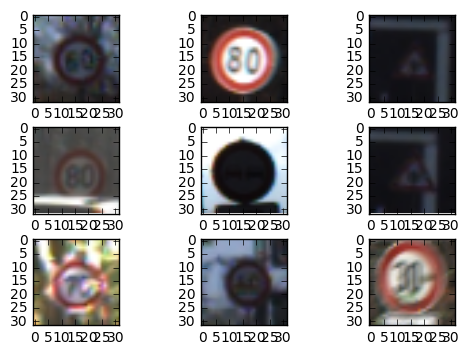

In [14]:
i = 10
incorrect_img = x_test_data[incorrect]
plot_images(incorrect_img[i:i+9], False)

### Confusion matrix

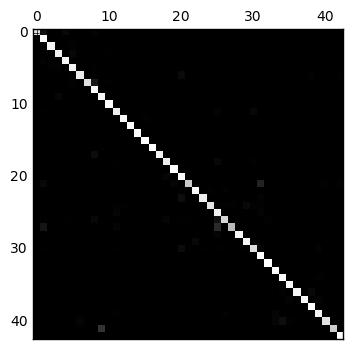

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.matshow(cm, cmap='gray')
plt.show()

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


<module 'matplotlib.pyplot' from '/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py'>

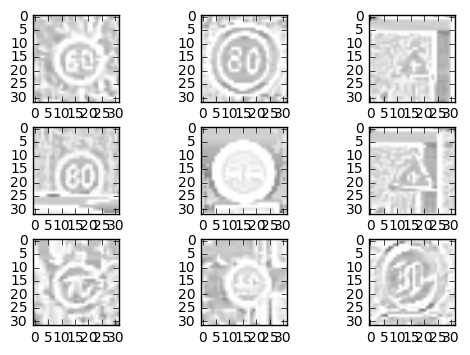

In [16]:
x_test_gs = preprocess_grayscale(x_test_data)
incorrect_img_gs = x_test_gs[incorrect]
incorrect_img_gs.shape
plot_images(incorrect_img_gs[i:i+9],False)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Visualizing 9 images can clearly see that images are very blurred and dark. Some extra preprocessing helps to better visualize traffic signs

### Testing model on my own images

(12630, 32, 32, 3)


<module 'matplotlib.pyplot' from '/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py'>

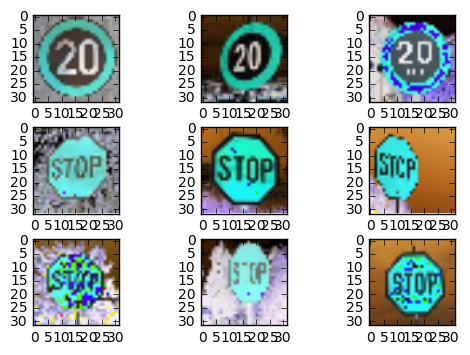

In [17]:
def load_img(cls, fn):
    fname = '../datasets/own/{}/{}.jpg'.format(cls,fn)
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32))
    return img

tshape = x_test_data.shape
print(tshape)
own_img = np.zeros((11,tshape[1],tshape[2],tshape[3]))

own_img[0] = load_img(0,1)
own_img[1] = load_img(0,4)
own_img[2] = load_img(0,5)

own_img[3] = load_img(14,0)
own_img[4] = load_img(14,1)
own_img[5] = load_img(14,2)
own_img[6] = load_img(14,4)
own_img[7] = load_img(14,5)
own_img[8] = load_img(14,6)

own_img[9] = load_img(18,0)
own_img[10] = load_img(18,1)

labels = np.array([0,0,0,14,14,14,14,14,14,18,18])

plot_images(own_img[0:9], False)

In [18]:
own_img = (own_img.astype(float)-128.0)/128.0

In [19]:
with tf.Session() as sess:
    saver.restore(sess, './{}'.format(model_filename))
    pred_all = sess.run(y_pred_cls, feed_dict={x:own_img, keep_prob:1})
    
pred_all

array([ 0,  0,  0, 14, 14, 12, 14, 12, 14, 18, 18])

In [20]:
pred_all == labels

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True], dtype=bool)

I have tried to pick signs which are in different forms from different positions. Only stop sign misclassified 2 times.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
probabilities = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, './{}'.format(model_filename))
    pred, prob = sess.run([y_pred_cls,probabilities], feed_dict={x:own_img, keep_prob:1})

In [22]:
acc = sum(pred == labels)/len(labels)
print(
    'Accuracy:\t{:.3f}\nReal labels:\t{}\nPredicted:\t{}\nProbabilities:\t{}'.format(
        acc, labels, pred, prob.max(axis=1)
    )
)

Accuracy:	0.818
Real labels:	[ 0  0  0 14 14 14 14 14 14 18 18]
Predicted:	[ 0  0  0 14 14 12 14 12 14 18 18]
Probabilities:	[ 0.99999964  1.          0.90397358  1.          1.          1.          1.
  1.          1.          1.          1.        ]


The accuracy dropped from 96% to 81%. Of course the signs are taken from different places/countries, but it may be an indicator that training dataset is not full enough for perfect performance. Also, it would be useful to try to generate additional images.

**Probabilities** array shows us that model is very confident about the predictions.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [23]:
with tf.Session() as sess:
    saver.restore(sess, './{}'.format(model_filename))
    pred, prob = sess.run([y_pred_cls,probabilities], feed_dict={x:own_img, keep_prob:1})
    top_k = sess.run(tf.nn.top_k(prob, k=3))

top_k_values = top_k[0]
top_k_indices = top_k[1]
print(top_k)

TopKV2(values=array([[  9.99999642e-01,   3.62442535e-07,   1.23238378e-10],
       [  1.00000000e+00,   4.75866990e-09,   1.65158720e-09],
       [  9.03973579e-01,   9.60252136e-02,   9.85750262e-07],
       [  1.00000000e+00,   4.40370589e-19,   3.00210469e-19],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.31394173e-13,   9.81324854e-15],
       [  1.00000000e+00,   9.40771455e-25,   4.97394971e-29],
       [  1.00000000e+00,   2.13588347e-08,   4.13694773e-11],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   6.07659401e-28,   3.84462592e-29],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[ 0,  1,  3],
       [ 0,  1,  8],
       [ 0,  8, 29],
       [14,  3, 17],
       [14,  0,  1],
       [12, 14, 17],
       [14, 13,  3],
       [12, 14, 10],
       [14,  0,  1],
       [18, 26, 27],
       [18,  0,  1]], dtype=int32))


It just confirms what we have observed before Probabilities array. Only for the third image the model "has some doubts" however for the for all the others the models predicts with very high confidence.
*Maybe it would be worth trying to reduce the number of epochs.*

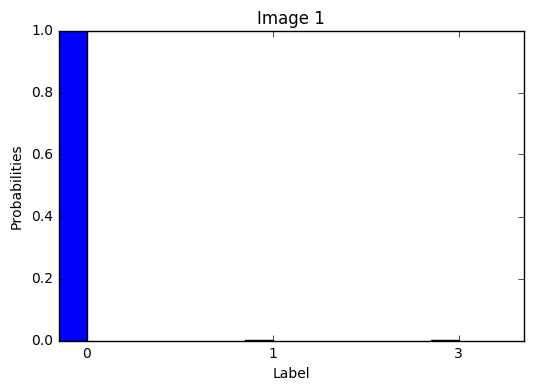

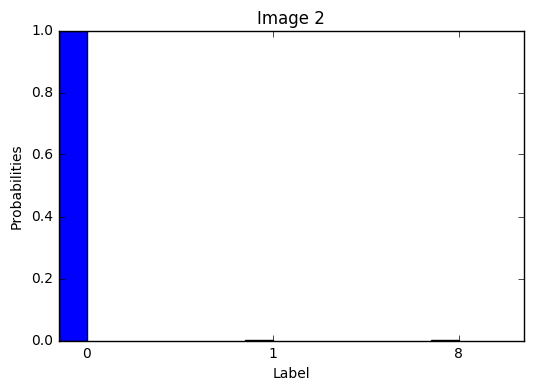

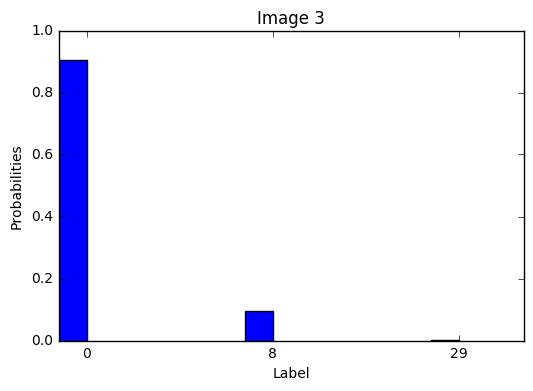

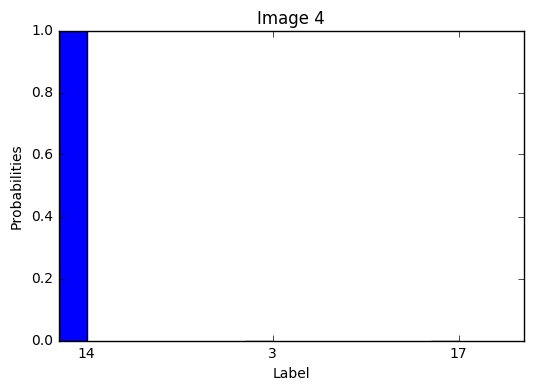

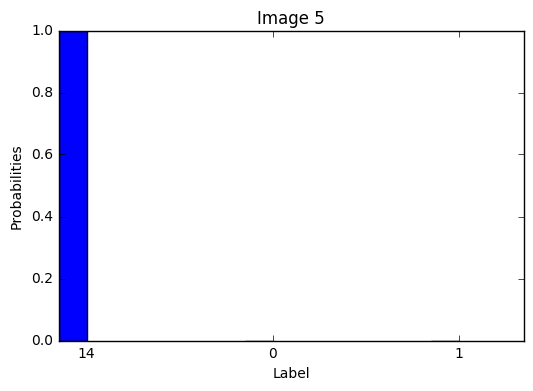

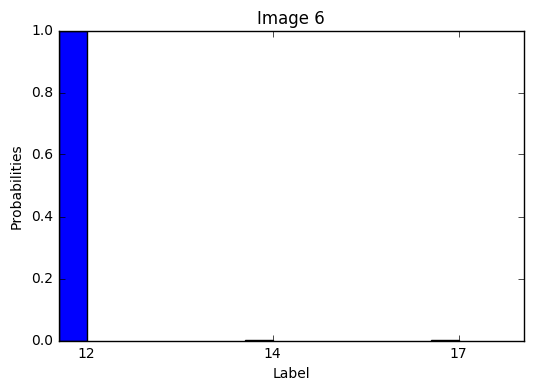

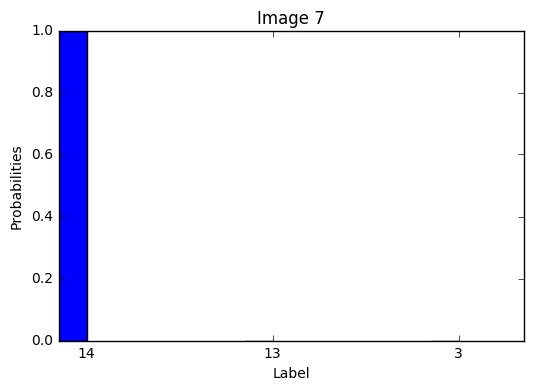

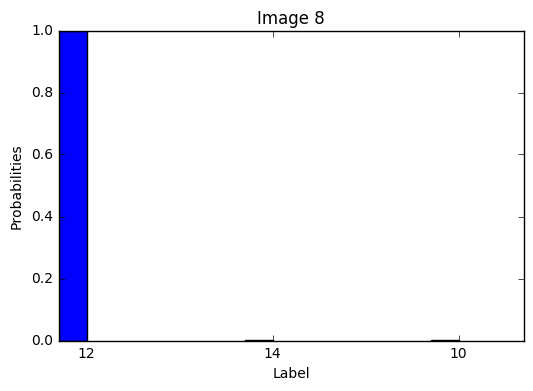

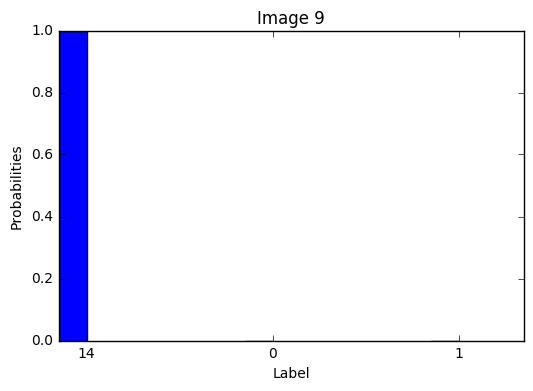

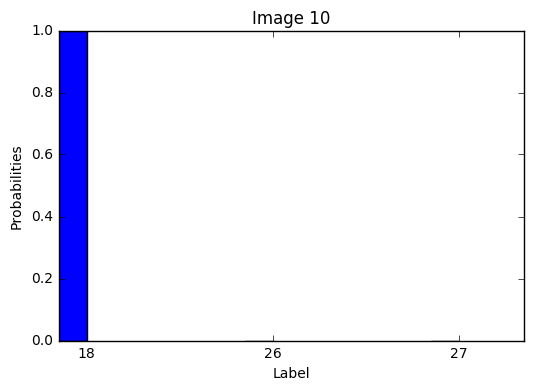

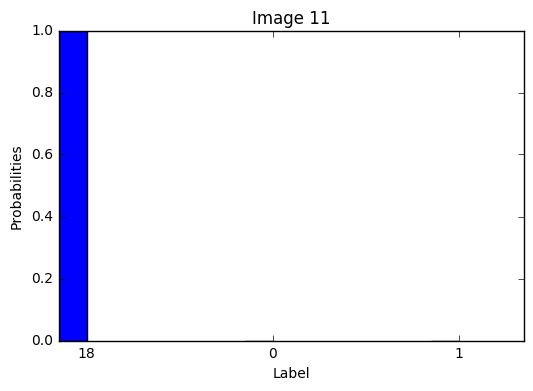

In [24]:
ind = np.arange(top_k_values.shape[1])
for i in range(len(labels)):
    plt.figure(i)
    values = top_k_values[i]
    plt.bar(ind, values, 0.15, color='b')
    plt.ylabel('Probabilities')
    plt.xlabel('Label')
    plt.title('Image {}'.format(str(i+1)))
    plt.xticks(ind+0.15, tuple(top_k_indices[i]))

plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.